To use machine learning (classification) to identify the presence of diabetes in patients through the 17 characteristics recorded from 520 patients.

The classification algorithms used in this project are 
1. Logistic Regression
2. K-Nearest Neighbors
3. Support Vector Machine

In [1]:
import numpy as np #  used for working with arrays
import pandas as pd # a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns # a Python data visualization library based on matplotlib which provides a high-level interface for drawing attractive and informative statistical graphics
import sklearn

In [92]:
df = pd.read_csv('Go_Uy_Dataset.csv', sep=';')

In [93]:
df.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                  int64
dtype: object

In [4]:
df.head(50)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,Male,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,Male,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,Male,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,Male,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,Male,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [5]:
df = df.copy()

In [6]:
df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,Female,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,Female,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,Female,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


### Data Cleaning

In [7]:
#Replacing Male and Female into 0 and 1, respectively
df.replace({'gender':{'Male':0, 'Female':1}}, inplace=True)
df['gender']

0      0
1      0
2      0
3      0
4      0
      ..
515    1
516    1
517    1
518    1
519    0
Name: gender, Length: 520, dtype: int64

In [8]:
df.age

0      40
1      58
2      41
3      45
4      60
       ..
515    39
516    48
517    58
518    32
519    42
Name: age, Length: 520, dtype: int64

In [9]:
#Grouping ages into their respective age ranges. Should only be run once
bins = [0,20,30,40,50,110]
labels = ['Below 20','21 to 30','31 to 40','41 to 50','Above 51']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)


In [10]:
df.age

0      31 to 40
1      Above 51
2      41 to 50
3      41 to 50
4      Above 51
         ...   
515    31 to 40
516    41 to 50
517    Above 51
518    31 to 40
519    41 to 50
Name: age, Length: 520, dtype: category
Categories (5, object): [Below 20 < 21 to 30 < 31 to 40 < 41 to 50 < Above 51]

In [11]:
df.replace({'age':{'Below 20':0, '21 to 30':1,'31 to 40': 2,'41 to 50':3,'Above 51':4}}, inplace=True)


In [12]:
df.head(50)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,2,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,4,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,3,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,3,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,4,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,4,0,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,4,0,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,4,0,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,4,0,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,4,0,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

### Checking for Outliers

In [14]:
# to get the column names of the datset
columns = df.columns
columns = columns.tolist()

In [15]:
columns

['age',
 'gender',
 'polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity',
 'class']

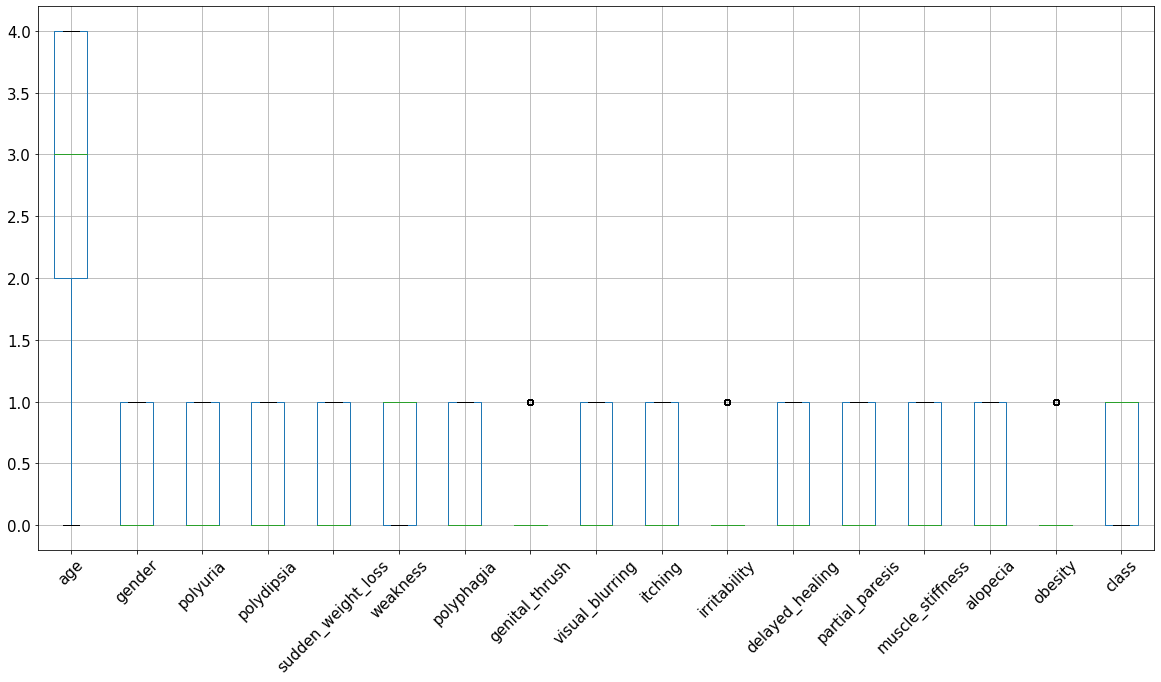

In [16]:
df.boxplot(column = columns, rot=45, fontsize = 15, grid = True, figsize = (20,10));

Since majority of the values are categorical (i.e. 1 or 0), checking for outliers is not needed

### Exploratory Data Analysis

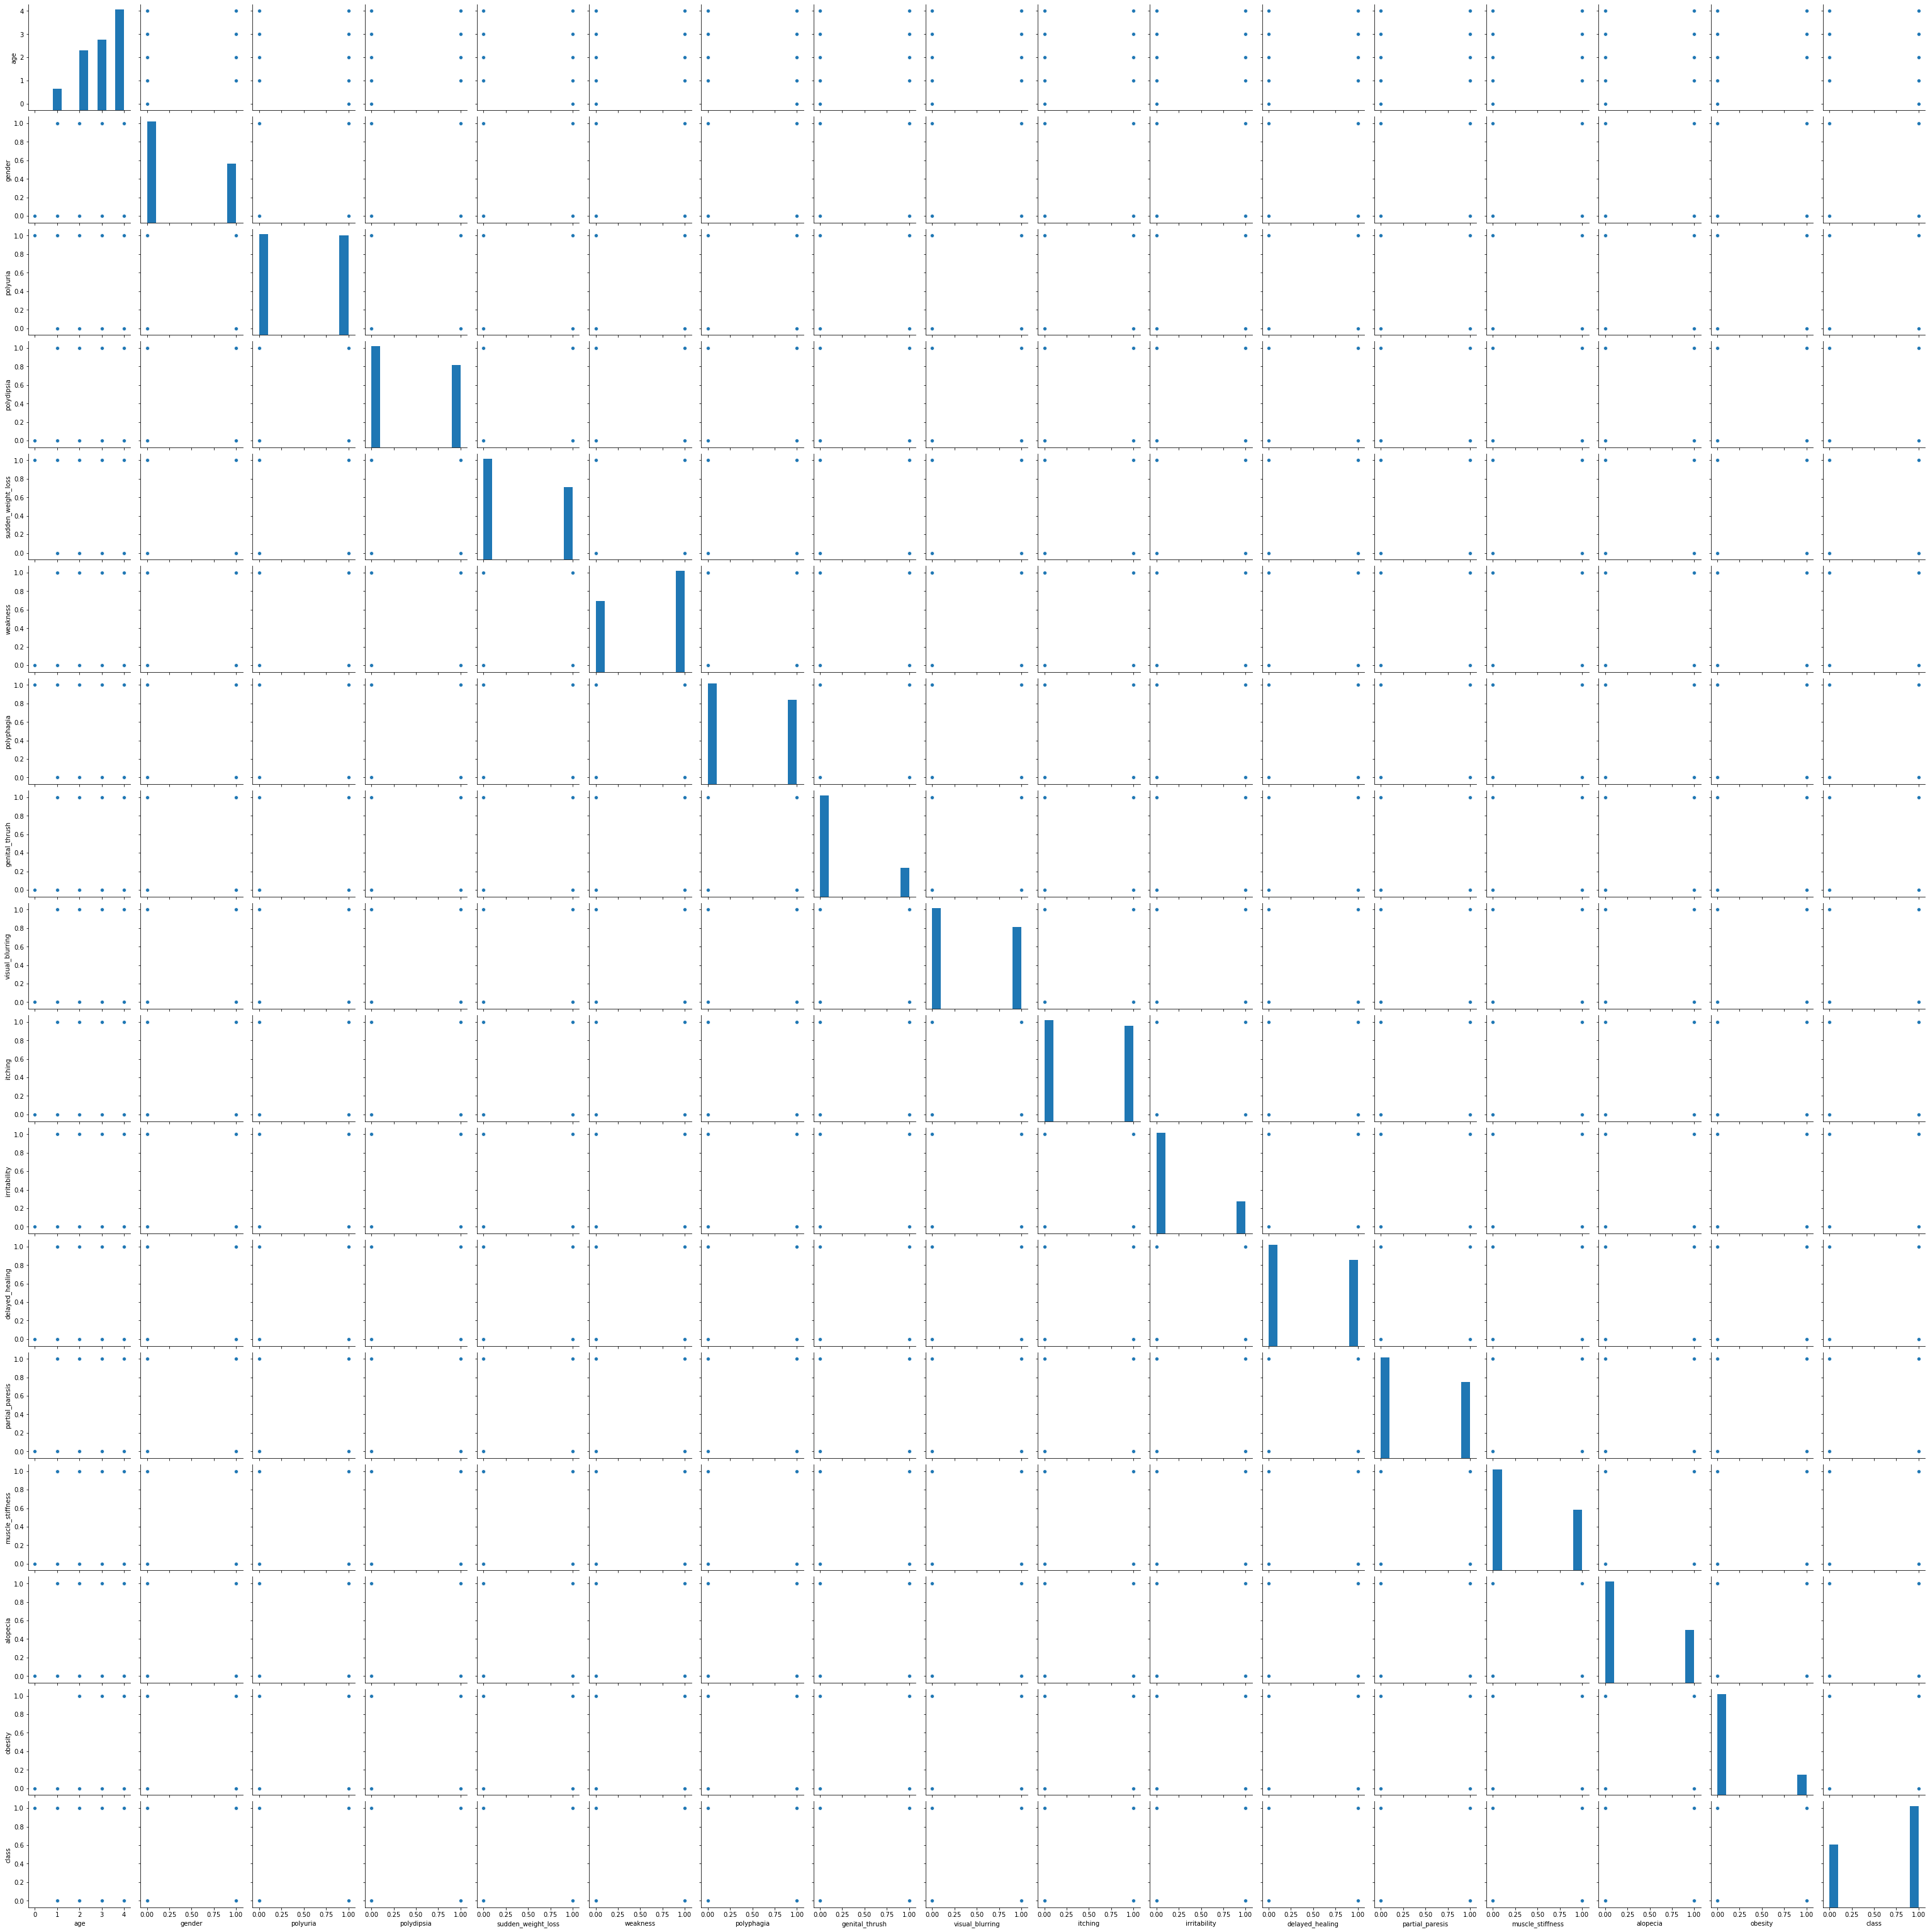

In [17]:
sns.pairplot(df)

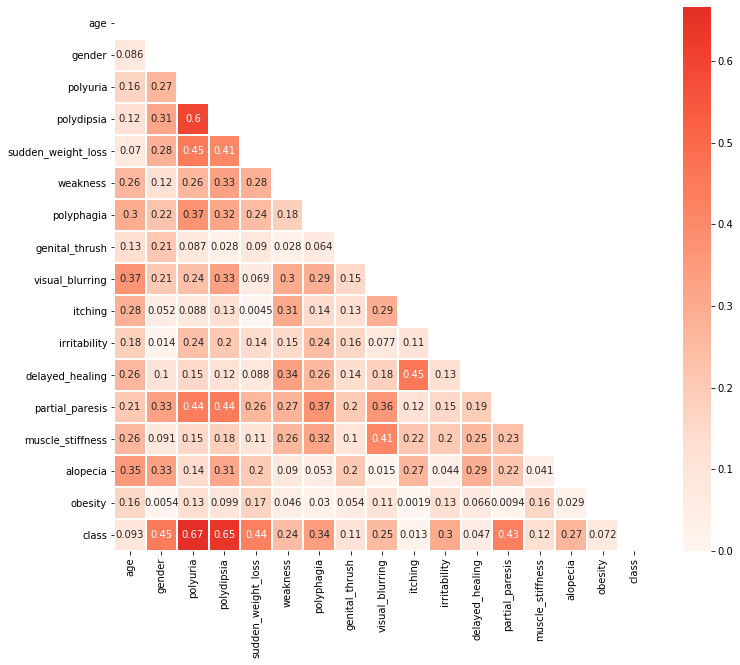

In [18]:
corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = plt.cm.Reds, annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.show()

In [19]:
df["class"] = df["class"].astype("category") 

### Separating Data

In [20]:
# To create the matrix of dependent variable, y
Y = df['class'].values
# To create the matrix of independent variable, x
X = df[df.columns.difference(['class', 'obesity'])].values


In [21]:
Y

[1, 1, 1, 1, 1, ..., 1, 1, 1, 0, 0]
Length: 520
Categories (2, int64): [0, 1]

In [22]:
X

array([[2, 1, 1, ..., 0, 0, 1],
       [4, 1, 0, ..., 0, 1, 1],
       [3, 1, 1, ..., 0, 0, 1],
       ...,
       [4, 0, 0, ..., 1, 1, 1],
       [2, 1, 1, ..., 0, 1, 1],
       [3, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
# To encode the categorical data
from sklearn.preprocessing import LabelEncoder

# A. To encode the categorical data (State) in the independent variable, X
label_encoder_X = LabelEncoder()
X[:,0] = label_encoder_X.fit_transform(X[:,0])

In [24]:
# To split the whole dataset into training dataset and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #train_size=0.8, you can either still put this or not since test_size is already defined. By default, remaining is for training

In [25]:
# To perform feature scaling 
# For standardization feature scaling
from sklearn.preprocessing import StandardScaler # for not normally distributed samples
standard_scaler = StandardScaler ()
X_train_standard = X_train.copy()
X_test_standard = X_test.copy()
X_train_standard = standard_scaler.fit_transform(X_train_standard)
X_test_standard = standard_scaler.fit_transform(X_test_standard) 

### Importing Necessary Machine Learning Models

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [27]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                       weights='uniform')),
 ('SVM',
  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False))]

In [28]:
# For Test Options and Evaluation Metric
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

results = []
names = []

for name, model in models:
	k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
	cv_results = cross_val_score(model, X, Y, cv=k_Fold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	printed_results = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(printed_results)

LR: 0.928846 (0.027264)
KNN: 0.928846 (0.029854)
SVM: 0.930769 (0.015385)


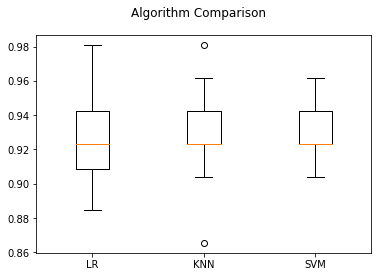

In [29]:
figure = plt.figure()
figure.suptitle('Algorithm Comparison')
axis = figure.add_subplot(111)
plt.boxplot(results)
axis.set_xticklabels(names)
plt.show()

## A. Logistic Regression

In [30]:
# To Instantiate the Model (Using the Default Parameters)
logistic_regression = LogisticRegression(random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

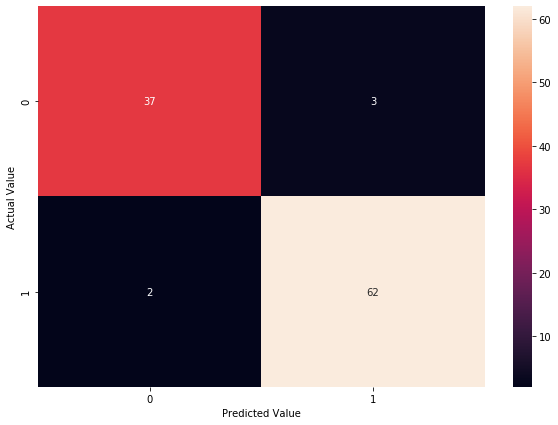

In [31]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [32]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9519



In [33]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



In [34]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

### Cross Validation for Logistic Regression (Default)

In [35]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=logistic_regression, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.94230769 0.96153846 0.86538462 0.96153846 0.88461538 0.98076923
 0.84615385 0.92307692 0.96153846 0.92307692]
 
Average Accuracy of K-FOLDS:
0.925
 
Accuracy Variance of K-FOLDS:
0.0433865929718403
 


In [36]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=logistic_regression, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.94230769 0.96153846 0.86538462 0.96153846 0.88461538 0.98076923
 0.84615385 0.92307692 0.96153846 0.92307692]
 
Average F1 of K-FOLDS:
0.925
 
F1 Variance of K-FOLDS:
0.0433865929718403
 


### Hold-out Validation for Logistic Regression (Default)

In [37]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_LogReg)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_LogReg)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_LogReg)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9519
 
Classification Error: 0.0481
 
Sensitivity or Recall Score: 0.9688
 
Specificity: 0.9250
 
False Positive Rate: 0.0750
 
Precision: 0.9538
 
F1 Score: 0.9612
 


## Optimization for Logistic Regression

#### Applying GridSearchCV to find the Best Parameters for the Logistic Regression Model

In [38]:
# To Import the StartifiedKFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1'], 'solver': ['liblinear','saga']},
              {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['none', 'l2'], 'solver': ['newton-cg', 'lbfgs', 'saga', 'sag']}]

grid_search = GridSearchCV(estimator = logistic_regression,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['none', 'l2'],
                 

In [39]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.384615,0.000000e+00,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli..."
1,0.615385,1.110223e-16,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}"
2,0.613462,5.769231e-03,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin..."
3,0.615385,1.110223e-16,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}"
4,0.884615,3.545979e-02,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline..."
...,...,...,...
65,0.928846,2.587235e-02,"{'C': 1000, 'penalty': 'none', 'solver': 'sag'}"
66,0.928846,2.587235e-02,"{'C': 1000, 'penalty': 'l2', 'solver': 'newton..."
67,0.928846,2.587235e-02,"{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}"
68,0.928846,2.587235e-02,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}"


In [40]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9288461538461539

BEST PARAMETERS:
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


#### Applying RandomizedSearchCV to find the Best Parameters for the Logistic Regression Model

In [41]:
# To Import the StratifiedKFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import RandomizedSearchCV

# To Set Parameters to be Optimized Under the Logistic Regression Model

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['none', 'l2'] # should also include l1 but it is necognized for the solver newton-cg.
solver = ['newton-cg', 'lbfgs', 'saga', 'sag']
parameters = dict(C=C, penalty=penalty, solver=solver)

#C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#penalty = ['l1', 'l2'] # should also include l1 but it is necognized for the solver newton-cg.
#solver = ['liblinear']
#parameters = dict(C=C, penalty=penalty, solver=solver)

randomized_search = RandomizedSearchCV(estimator = logistic_regression,
                                       param_distributions = parameters,
                                       n_iter = 56,
                                       scoring = 'accuracy',
                                       cv = k_Fold,
                                       n_jobs = -1,
                                       random_state = 0)
best_fit = randomized_search.fit(X, Y)
print(randomized_search)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=0,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=56, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['none', 'l2'],
              

C:\Users\Public\Python\lib\site-packages\sklearn\linear_model\_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


In [42]:
# To View the Results of the GridSearch
pd.DataFrame(randomized_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.928846,2.587235e-02,"{'solver': 'newton-cg', 'penalty': 'none', 'C'..."
1,0.928846,2.587235e-02,"{'solver': 'lbfgs', 'penalty': 'none', 'C': 0...."
2,0.928846,2.587235e-02,"{'solver': 'saga', 'penalty': 'none', 'C': 0.001}"
3,0.928846,2.587235e-02,"{'solver': 'sag', 'penalty': 'none', 'C': 0.001}"
4,0.615385,1.110223e-16,"{'solver': 'newton-cg', 'penalty': 'l2', 'C': ..."
5,0.615385,1.110223e-16,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.001}"
6,0.615385,1.110223e-16,"{'solver': 'saga', 'penalty': 'l2', 'C': 0.001}"
7,0.615385,1.110223e-16,"{'solver': 'sag', 'penalty': 'l2', 'C': 0.001}"
8,0.928846,2.587235e-02,"{'solver': 'newton-cg', 'penalty': 'none', 'C'..."
9,0.928846,2.587235e-02,"{'solver': 'lbfgs', 'penalty': 'none', 'C': 0.01}"


In [43]:
# To Identify the Best Accuracy and Best Features

best_accuracy = randomized_search.best_score_
best_parameters = randomized_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.9288461538461539

BEST PARAMETERS:
{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.001}


###### To Create New Logistic Regression Model Using the Optimal Parameters

In [44]:
# To Instantiate the Model (Using the Optimized Parameters)
logistic_regression = LogisticRegression(C=10, penalty = 'l1', solver='liblinear', random_state=0)

# To Fit the Training Dataset into Logistic Regression Model
logistic_regression.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_LogReg = logistic_regression.predict(X_test)
Y_predict_LogReg

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

###### To Evaluate the Performance of the Logistic Regression Model

Text(69.0, 0.5, 'Actual Value')

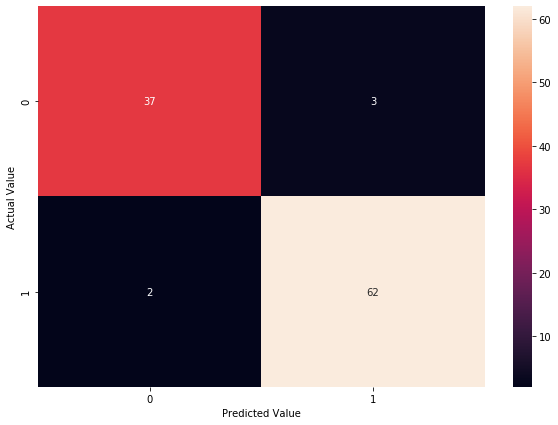

In [45]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_LogReg)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

In [46]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg, normalize ='zero_division')
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9519



In [47]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_LogReg))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        40
           1       0.95      0.97      0.96        64

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



In [48]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [49]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=logistic_regression, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[0.94230769 0.96153846 0.84615385 0.96153846 0.88461538 0.96153846
 0.86538462 0.92307692 0.96153846 0.90384615]
 
Average Accuracy of K-FOLDS:
0.9211538461538462
 
Accuracy Variance of K-FOLDS:
0.04164693813020716
 


In [50]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=logistic_regression, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[0.94230769 0.96153846 0.84615385 0.96153846 0.88461538 0.96153846
 0.86538462 0.92307692 0.96153846 0.90384615]
 
Average F1 of K-FOLDS:
0.9211538461538462
 
F1 Variance of K-FOLDS:
0.04164693813020716
 


In [51]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_LogReg)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_LogReg)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_LogReg)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_LogReg)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9519
 
Classification Error: 0.0481
 
Sensitivity or Recall Score: 0.9688
 
Specificity: 0.9250
 
False Positive Rate: 0.0750
 
Precision: 0.9538
 
F1 Score: 0.9612
 


## B. KNN model

In [52]:
# To fit the training dataset into a KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm='brute',n_neighbors=5, metric='minkowski', p=2, n_jobs=-1)
model.fit(X_train_standard, Y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

###### To Evaluate the Performance of the K-Nearest Neighbors Machine Model

In [53]:
# To Instantiate the Model
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=4, weights='distance', algorithm='auto', leaf_size=10)

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

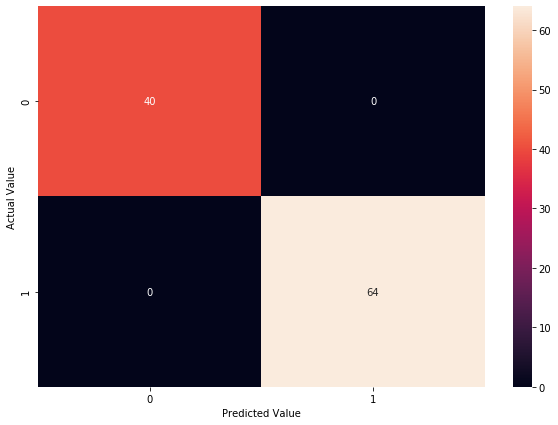

In [54]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [55]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 1.0000



In [56]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



### Cross Validation for KNN (Default)

In [57]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [58]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=k_nearest_neighbors, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[1.         1.         0.92307692 0.94230769 0.96153846 0.98076923
 0.92307692 0.96153846 0.96153846 0.94230769]
 
Average Accuracy of K-FOLDS:
0.9596153846153845
 
Accuracy Variance of K-FOLDS:
0.026437936701668295
 


In [59]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=k_nearest_neighbors, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[1.         1.         0.92307692 0.94230769 0.96153846 0.98076923
 0.92307692 0.96153846 0.96153846 0.94230769]
 
Average F1 of K-FOLDS:
0.9596153846153845
 
F1 Variance of K-FOLDS:
0.026437936701668295
 


In [60]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_KNN)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_KNN)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_KNN)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 1.0000
 
Classification Error: 0.0000
 
Sensitivity or Recall Score: 1.0000
 
Specificity: 1.0000
 
False Positive Rate: 0.0000
 
Precision: 1.0000
 
F1 Score: 1.0000
 


## Optimization for KNN

#### Applying GridSearch to find the Best Parameters for the K-Nearest Neighbors Machine Model

In [61]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold (n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the K Nearest Neighbors Model
k_range = list(range(1, 51))
weight = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [10, 20, 30, 40, 50, 60, 70, 80, 100]
parameters = dict(n_neighbors=k_range, weights=weight, algorithm=algorithm, leaf_size=leaf_size)
grid_search = GridSearchCV(estimator = k_nearest_neighbors,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=10,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=4, p=2,
                                            weights='distance'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 100],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=Tr

In [62]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.975000,0.025872,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
1,0.975000,0.025872,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
2,0.942308,0.021066,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
3,0.975000,0.022835,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
4,0.961538,0.022754,"{'algorithm': 'auto', 'leaf_size': 10, 'n_neig..."
...,...,...,...
3595,0.936538,0.022835,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3596,0.867308,0.029101,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3597,0.934615,0.024627,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."
3598,0.855769,0.034669,"{'algorithm': 'brute', 'leaf_size': 100, 'n_ne..."


In [63]:
# To Identify the Best Accuracy and Best Features

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.976923076923077

BEST PARAMETERS:
{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 1, 'weights': 'uniform'}


###### To Create New K-Nearest Neighbors Model Using the Optimal Parameters

In [64]:
# To Instantiate the Model
k_nearest_neighbors = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', leaf_size=30)

# To Fit the Training Dataset into K Nearest Neighbors Model
k_nearest_neighbors.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_KNN = k_nearest_neighbors.predict(X_test)
Y_predict_KNN

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

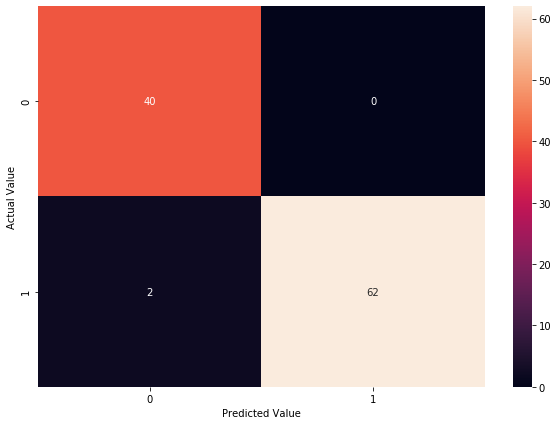

In [65]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_KNN)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [66]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9808



In [67]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_KNN))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



### Cross Validation for KNN (Optimized)

In [68]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [69]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=k_nearest_neighbors, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[1.         0.98076923 0.94230769 0.94230769 0.98076923 0.96153846
 0.96153846 0.96153846 0.94230769 0.96153846]
 
Average Accuracy of K-FOLDS:
0.9634615384615385
 
Accuracy Variance of K-FOLDS:
0.018142271407801155
 


In [70]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=k_nearest_neighbors, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[1.         0.98076923 0.94230769 0.94230769 0.98076923 0.96153846
 0.96153846 0.96153846 0.94230769 0.96153846]
 
Average F1 of K-FOLDS:
0.9634615384615385
 
F1 Variance of K-FOLDS:
0.018142271407801155
 


In [71]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_KNN)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_KNN)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_KNN)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_KNN)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9808
 
Classification Error: 0.0192
 
Sensitivity or Recall Score: 0.9688
 
Specificity: 1.0000
 
False Positive Rate: 0.0000
 
Precision: 1.0000
 
F1 Score: 0.9841
 


## C. SVM Regression

In [72]:
# To Instantiate the Model (Using the Default Parameters)
support_vector_machine = SVC(random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
support_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Testing Dataset
Y_predict_SVM = support_vector_machine.predict(X_test)
Y_predict_SVM

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

###### To Evaluate the Performance of the Support Vector Machine Model

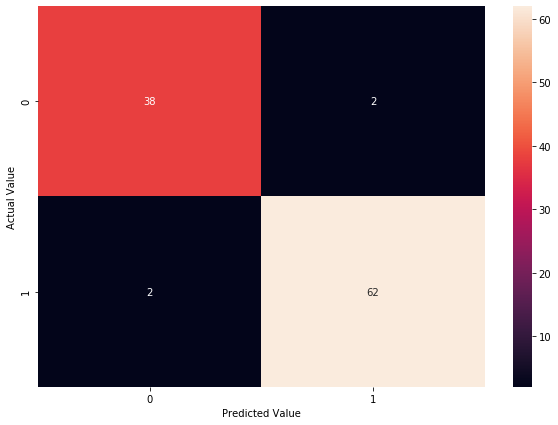

In [73]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [74]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 0.9615



In [75]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))


CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        40
           1       0.97      0.97      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



### Cross Validation for SVM (Default)

In [76]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [77]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=support_vector_machine, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[1.         1.         0.92307692 0.96153846 0.96153846 1.
 0.94230769 0.98076923 0.98076923 0.98076923]
 
Average Accuracy of K-FOLDS:
0.973076923076923
 
Accuracy Variance of K-FOLDS:
0.02462740091320325
 


In [78]:
# For the F1 as scoring for for cross-validation 
F1 = cross_val_score(estimator=support_vector_machine, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[1.         1.         0.92307692 0.96153846 0.96153846 1.
 0.94230769 0.98076923 0.98076923 0.98076923]
 
Average F1 of K-FOLDS:
0.973076923076923
 
F1 Variance of K-FOLDS:
0.02462740091320325
 


### Hold-out Validation for SVM (Default)

In [79]:
# To evaluate the performance of the logistic regression model using holdout

# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_SVM)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_SVM)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_SVM)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 0.9615
 
Classification Error: 0.0385
 
Sensitivity or Recall Score: 0.9688
 
Specificity: 0.9500
 
False Positive Rate: 0.0500
 
Precision: 0.9688
 
F1 Score: 0.9688
 


## Optimization for SVM

#### Applying GridSearch to find the Best Parameters for the Support Vector Machine Model

In [80]:
# To Import the kFold Class
from sklearn.model_selection import StratifiedKFold
k_Fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# To Import the GridSearch Class
from sklearn.model_selection import GridSearchCV

# To Set Parameters to be Optimized Under the Support Vector Machine Model
parameters = [{'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['linear'], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 5, 10], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['poly'], 'gamma': [0.1, 0.5, 1, 5, 10], 'degree': [2, 3, 4, 5], 'decision_function_shape' : ['ovo', 'ovr']},
              {'C': [0.001, 0.01, 0.1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.1, 0.5, 1, 5, 10]}]
grid_search = GridSearchCV(estimator = support_vector_machine,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_Fold,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=0, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             par...
                          'gamma': [0.1, 0.5, 1, 5, 10], 'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'degree': [2, 3, 4, 5], 'gamma': [0.1, 0.5, 1, 5, 10],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 10, 100, 1000],
                          'gamma

In [81]:
# To View the Results of the GridSearch
pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.615385,1.110223e-16,"{'C': 0.001, 'decision_function_shape': 'ovo',..."
1,0.615385,1.110223e-16,"{'C': 0.001, 'decision_function_shape': 'ovr',..."
2,0.867308,3.889182e-02,"{'C': 0.01, 'decision_function_shape': 'ovo', ..."
3,0.867308,3.889182e-02,"{'C': 0.01, 'decision_function_shape': 'ovr', ..."
4,0.892308,3.768446e-02,"{'C': 0.1, 'decision_function_shape': 'ovo', '..."
...,...,...,...
337,0.596154,5.160157e-02,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid'}"
338,0.494231,5.163739e-02,"{'C': 1000, 'gamma': 0.5, 'kernel': 'sigmoid'}"
339,0.498077,5.192308e-02,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid'}"
340,0.615385,1.110223e-16,"{'C': 1000, 'gamma': 5, 'kernel': 'sigmoid'}"


In [82]:
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("BEST ACCURACY SCORE:")
print(best_accuracy)
print('')

print("BEST PARAMETERS:")
print(best_parameters)

BEST ACCURACY SCORE:
0.973076923076923

BEST PARAMETERS:
{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 0.1, 'kernel': 'rbf'}


###### To Create New Support Vector Machine Model Using the Optimized Parameters

In [83]:
# To Instantiate the Model (Using the Optimized Parameters)
state_vector_machine = SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='rbf', random_state=0)

# To Fit the Training Dataset into Support Vector Machine Model
state_vector_machine.fit(X_train, Y_train)

# To Predict the Output of the Training Dataset
Y_predict_SVM = state_vector_machine.predict(X_test)
Y_predict_SVM


array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

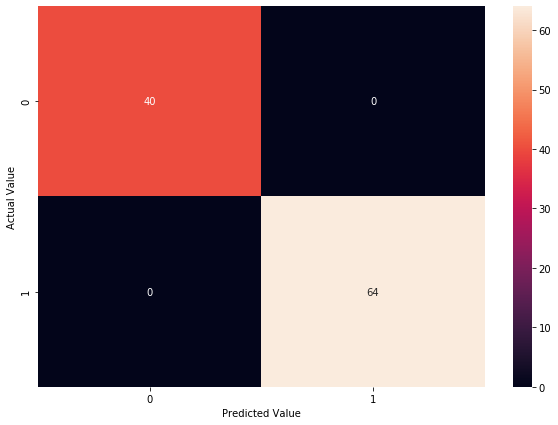

In [84]:
# To Show the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_predict_SVM)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

TP = confusion_matrix[1,1]
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]

In [85]:
# For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print('')

Classification Accuracy: 1.0000



In [86]:
# For the Classification Report
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT:")
print(classification_report(Y_test, Y_predict_SVM))

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



### Cross Validation for SVM (Optimized)

In [87]:
# To apply K-fold cross-validation for the logistic regression model
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0) # shuffle = True para sa small dataset

from sklearn.model_selection import cross_val_score

# To feature scale the X_dummytrap Using Standardization
X_standard = X.copy()
X_standard = standard_scaler.fit_transform(X_standard)

In [88]:
# For the accuracy as scoring for for cross-validation 
accuracies = cross_val_score(estimator=state_vector_machine, X=X_standard, y=Y, cv=k_fold, scoring='accuracy')

accuracies_average = accuracies.mean()
accuracies_variance = accuracies.std()

print('Accuracy of K-FOLDS:')
print (accuracies)
print(' ')
print('Average Accuracy of K-FOLDS:')
print(accuracies_average)
print(' ')
print('Accuracy Variance of K-FOLDS:')
print(accuracies_variance)
print(' ')

Accuracy of K-FOLDS:
[1.         1.         0.94230769 0.96153846 1.         0.98076923
 0.94230769 0.98076923 0.98076923 1.        ]
 
Average Accuracy of K-FOLDS:
0.9788461538461538
 
Accuracy Variance of K-FOLDS:
0.021841955176154903
 


In [89]:
# For the F1 as scoring for cross-validation 
F1 = cross_val_score(estimator=state_vector_machine, X=X_standard, y=Y, cv=k_fold)

F1_average = F1.mean()
F1_variance = F1.std()

print('F1 of K-FOLDS:')
print (F1)
print(' ')
print('Average F1 of K-FOLDS:')
print(F1_average)
print(' ')
print('F1 Variance of K-FOLDS:')
print(F1_variance)
print(' ')

F1 of K-FOLDS:
[1.         1.         0.94230769 0.96153846 1.         0.98076923
 0.94230769 0.98076923 0.98076923 1.        ]
 
Average F1 of K-FOLDS:
0.9788461538461538
 
F1 Variance of K-FOLDS:
0.021841955176154903
 


In [90]:
# To evaluate the performance of the logistic regression model using holdout
# A. For the Classification Accuracy
from sklearn.metrics import accuracy_score
classification_accuracy = accuracy_score(Y_test, Y_predict_SVM)
print('Classification Accuracy: %.4f'
      % classification_accuracy)
print(' ')

# B. For the Classification Error
from sklearn.metrics import accuracy_score
classification_error = 1-classification_accuracy
print('Classification Error: %.4f'
      % classification_error)
print(' ')

# C. For the Sensitivity or Recall Score / True Positive Rate (If looking at the positive, how often does positive occur? Performance of predicting + and - should be the same to consider the model without bias towards one class
# True Positive Rate:  Actual Value +, how often Correct
from sklearn.metrics import recall_score
sensitivity = recall_score(Y_test, Y_predict_SVM)
print('Sensitivity or Recall Score: %.4f'
      % sensitivity)
print(' ')

# D. For the Specficity (If looking at the negative actual, how often does negative occur? Performance of predicting + and - should be the same to consider the model without bias towards one class. 
# Counterpart of sensitivity)
# True Negative Rate: Actual Value -, how often correct
specificity = TN/(TN+FP)
print('Specificity: %.4f'
      % specificity)
print(' ') 

# E. For the FP rate .
# False Positive Rate: Actual Value -, how often inorrect
false_positve_rate = 1-specificity
print('False Positive Rate: %.4f'
      % false_positve_rate)
print(' ')  

# F. For the precision.
# False Negative Rate: Predicted Value +, how often the prediction is positive
from sklearn.metrics import precision_score
precision = precision_score(Y_test, Y_predict_SVM)
print('Precision: %.4f'
      % precision)
print(' ')  

# G. For the F1 score. Relating precision and sensitivity
# False Negative Rate: Predicted Value and Actual Value+, how often the prediction is correct relation
from sklearn.metrics import f1_score
f1_score = f1_score(Y_test, Y_predict_SVM)
print('F1 Score: %.4f'
      % f1_score)
print(' ')  

Classification Accuracy: 1.0000
 
Classification Error: 0.0000
 
Sensitivity or Recall Score: 1.0000
 
Specificity: 1.0000
 
False Positive Rate: 0.0000
 
Precision: 1.0000
 
F1 Score: 1.0000
 


In [91]:
# H. For classification report
from sklearn.metrics import classification_report
classification_report = classification_report(Y_test, Y_predict_SVM)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

